# PRÁCTICA 1: CLASIFICACIÓN PARA EL DIAGNÓSTICO DE ENFERMEDADES II

---------
Jose Manuel Flores Emmi y Leire Pantoja Jiménez

## Introducción

En el ámbito de la medicina y la atención de la salud, la capacidad de diagnosticar enfermedades de manera precisa y oportuna es esencial para la mejora de la calidad de vida de los pacientes. En este contexto, la aplicación de algoritmos de aprendizaje automático se ha convertido en una herramienta valiosa para los profesionales de la salud, ya que permite analizar grandes conjuntos de datos médicos y proporcionar diagnósticos más precisos.

Este trabajo tiene como objetivo explorar y comprender un contexto de aplicación real en el campo de la salud, específicamente en el diagnóstico de pacientes hepáticos. Servirá como una oportunidad para evaluar las capacidades de Python y Scikit-Learn, dos herramientas ampliamente utilizadas en el campo de la ciencia de datos y el aprendizaje automático, para la implementación de algoritmos de clasificación. Esto permitirá determinar su eficacia y eficiencia en el contexto de un problema real de diagnóstico de pacientes hepáticos.

En este proceso de análisis de datos, se recorrerán las etapas de un proyecto completo, desde la recopilación y preparación de datos hasta la evaluación de modelos. Además, compararemos dos algoritmos de clasificación ampliamente utilizados, KNN y árbol de decisión, para comprender su desempeño en el diagnóstico de pacientes hepáticos.

El objetivo final es contribuir al avance de la medicina de precisión y la optimización de los recursos en el sector de la salud, mejorando la capacidad de diagnóstico y tratamiento de enfermedades hepáticas.






## Análisis Exploratorio de Datos

En primer lugar realizaremos un Análisis Exploratorio de Datos para investigar el volumen y el tipo de datos con los que contamos. Esto nos permitirá identificar la diversidad de variables y características disponibles en nuestro conjunto de datos, así como evaluar si es necesario realizar normalizaciones para estandarizar la escala de las características. Además, el EDA también nos ayudará a detectar la presencia de valores faltantes y nos indicará de que tipo son cada una de las variables por si hiciera falta realizar alguna transformación. Aunque parezca un paso insignificante, es de crucial importancia conocer bien los datos con los que se va a trabajar para poder tomar la mejor decisión acerca del preproceso a utilizar.

En primer lugar cargamos todas las librerías que se van a utilizar a lo largo de todo el trabajo.

In [ ]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos el conjunto de datos "Indian Liver Patient Dataset".

In [ ]:
#Cargamos los datos y lo asignamos a una variable.
df = pd.read_csv('/content/drive/MyDrive/Practica 1/ILPD.csv')


Exploramos el dataframe para conocer los aspectos más importantes de los datos.

In [ ]:
#Explorar el dataframe
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.describe())

(583, 11)
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')
Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            2

El conjunto cuenta con 583 instancias y 11 variables de las cuales solo "Gender" es categórica, lo cual tendremos que tener en cuenta para el futuro. Además se muestra la media, el mínimo, el máximo y los principales cuartiles de las variables numéricas. La variable a predecir es "Dataset" que indica si el paciente está enfermo con un 1 y si el paciente está sano con un 2. Al ser la variable respuesta de tipo categórica nos encontramos ante un problema de clasificación y no de regresión.

Calculamos el número de datos faltantes y obtenemos que son 4.

In [ ]:
X=df.drop('Dataset', axis=1) #Aqui tengo todas las variables menos la variable respuesta
y=df['Dataset'] #Separo la variable respuesta en un unico vector

In [ ]:
#Calcular el número de valores faltantes por columna
missing_values_count=X.isnull().sum()

#Calcular el porcentaje de valores faltantes por columna
missing_values_percent=100*missing_values_count/len(X)

#Crear un dataframe con el número y el porcentaje de valores faltantes
missing_values_X=pd.DataFrame({'count':missing_values_count, 'percent': missing_values_percent})

#Mostrar el dataframe ordenado por porcentaje de forma descendente
missing_values_X.sort_values('percent', ascending=False)


,count,percent
Albumin_and_Globulin_Ratio,4,0.686106
Age,0,0.000000
Gender,0,0.000000
Total_Bilirubin,0,0.000000
Direct_Bilirubin,0,0.000000
Alkaline_Phosphotase,0,0.000000
Alamine_Aminotransferase,0,0.000000
Aspartate_Aminotransferase,0,0.000000
Total_Protiens,0,0.000000
Albumin,0,0.000000


Vamos a ver si las variables siguen una distribución normal.

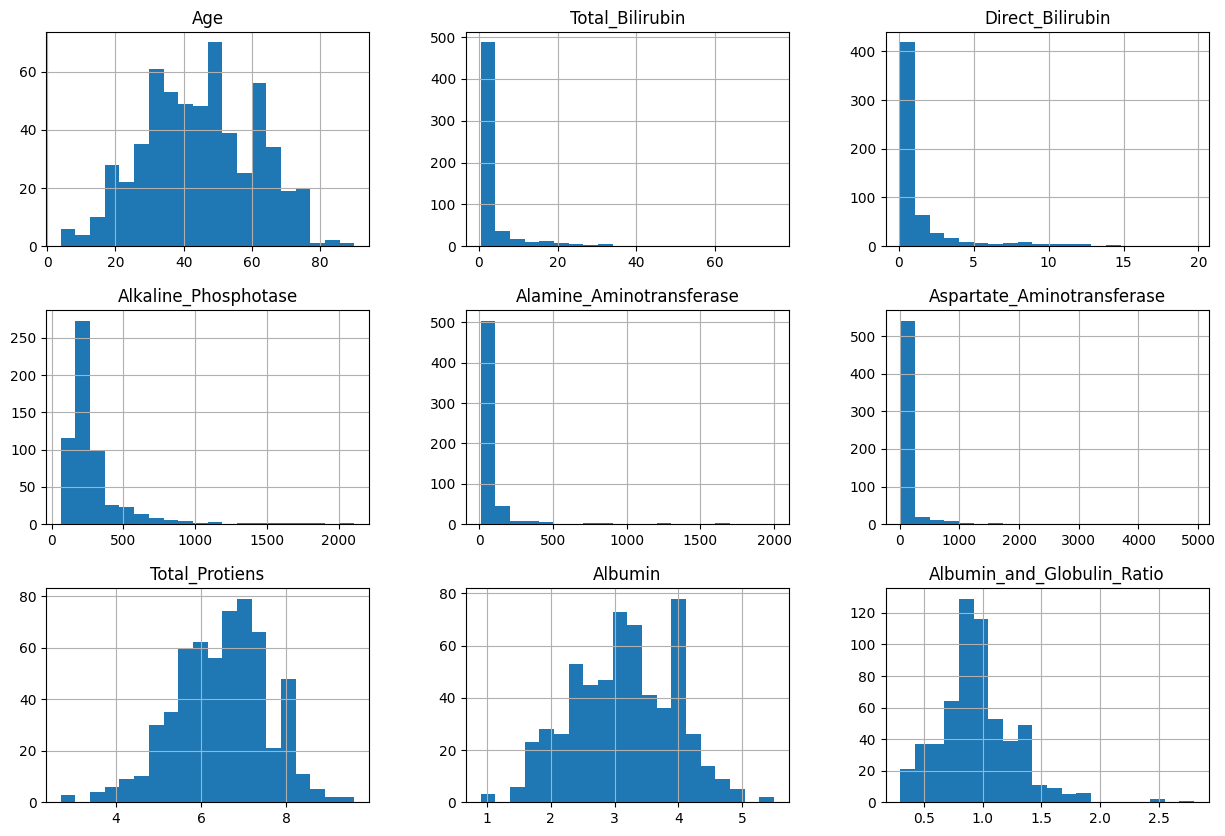

In [ ]:
#Generar histogramas para las variables numéricas
X.hist(bins=20, figsize=(15,10))
plt.show()

Observamos que la mayoría de las variables no siguen una distribución normal. Por último creamos un gráfico de dispersión para las variables numéricas.

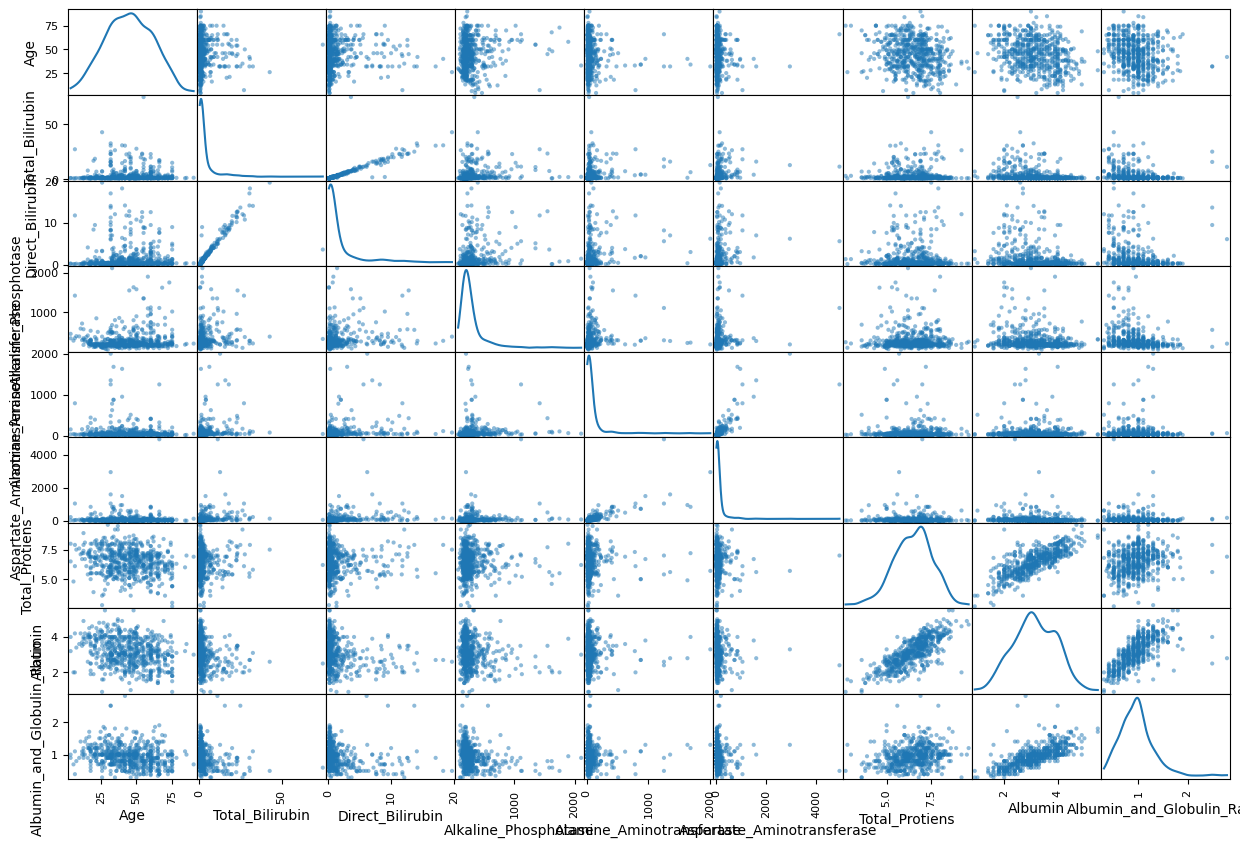

In [ ]:
#Generar una matriz de diagramas de dispersión para las variables numéricas
pd.plotting.scatter_matrix(X, figsize=(15,10), diagonal='kde')
plt.show()

Una vez tenemos los aspectos más importantes de nuestros datos podemos proceder a realizar el KNN.

## KNN

El algoritmo KNN es un método muy conocido en el mundo del aprendizaje automático y su principal objetivo es asignar una etiqueta de clase a un punto de datos desconocido basándose en la mayoría de las etiquetas de clase de los puntos de datos vecinos más cercanos en un conjunto de datos de entrenamiento.

Para ello primero calcula la distancia entre el item a clasificar y el resto de items del conjunto de datos de entrenamiento, luego selecciona los "k" elementos más cercanos y de esos elementos se ve cuales conforman una mayoría de clase para poder clasificar una nuevo dato. El principal hiperparámetro que se puede ajustar en el modelo es la "k", el número de vecinos que se eligen para tomar la decisión. Es importante que esa "k" sea un número impar para que no haya un empate.

KNN es un algoritmo supervisado perezoso porque durante el entrenamiento solo guarda las instancias, no construye ningún modelo, y la clasificación se hace cuando llega la instancia de test. Por ello requiere de mucha memoria y recursos de procesamiento por lo que tiende a funcionar mejor con conjuntos de datos pequeños.

### Preprocesado

Una vez hemos realizado el primer análisis de los datos ya podemos empezar a preparar el algoritmo KNN. Para ello es necesario hacer algunas modificaciones a los datos para que el algoritmo funcione correctamente.

El primer paso del preprocesado ya se ha hecho anteriormente y es separar la base de datos en dos partes, una con la variable respuesta y otra con las variables predictivas.

Es importante saber en que parte del proceso hay que realizar el preprocesado para que no haya fugas de información, y aunque la tentación es hacerlo sobre los datos originales, esto no es correcto porque para hacerlo se estarían utilizando datos que luego se usarían para el test. Los datos de la muestra test tenemos que suponer que no los conocemos.

La única parte que si vamos a aplicar sobre los datos originales es la creación de variables dummy. En los datos originales la variable "Gender" es del tipo factor y para que los algoritmos que vamos a implementar más adelante funcionen correctamente esta variable tiene que estar codificada de la forma 0/1. Es un proceso que no implica fuga de información.

In [ ]:
#One shot
X=pd.get_dummies(X, columns=['Gender']) #Transformamos la variable en factor

A continuación dividimos la base de datos en una muestra de entrenamiento y en otra de test antes de realizar los siguientes pasos del preprocesado.

In [ ]:
#Dividir aleatoriamente el conjunto de datos en entrenatimiento y prueba con Holdout
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=41)


Una parte importante del preprocesado es ver si hay datos faltantes en alguna variable. Empezamos por el conjunto de entrenamiento.

In [ ]:
#Calcular el número de valores faltantes por columna
missing_values_count=x_train.isnull().sum()

#Calcular el porcentaje de valores faltantes por columna
missing_values_percent=100*missing_values_count/len(x_train)

#Crear un dataframe con el número y el porcentaje de valores faltantes
missing_values_x_train=pd.DataFrame({'count':missing_values_count, 'percent': missing_values_percent})

#Mostrar el dataframe ordenado por porcentaje de forma descendente
missing_values_x_train.sort_values('percent', ascending=False)

,count,percent
Albumin_and_Globulin_Ratio,2,0.429185
Age,0,0.000000
Total_Bilirubin,0,0.000000
Direct_Bilirubin,0,0.000000
Alkaline_Phosphotase,0,0.000000
Alamine_Aminotransferase,0,0.000000
Aspartate_Aminotransferase,0,0.000000
Total_Protiens,0,0.000000
Albumin,0,0.000000
Gender_Female,0,0.000000


Observamos que hay 2 datos faltantes en la variable "Albumin_and_Globulin_Ratio" y decidimos rellenar esos datos con la media de la variable.

In [ ]:
#Calculamos la media de la columna
media_xtrain=x_train['Albumin_and_Globulin_Ratio'].mean()

#Rellenamos los valores faltantes con la media
x_train['Albumin_and_Globulin_Ratio'].fillna(media_xtrain, inplace=True)

#Calcular el número de valores faltantes por columna
missing_values_count=x_train.isnull().sum()

#Calcular el porcentaje de valores faltantes por columna
missing_values_percent=100*missing_values_count/len(x_train)

#Crear un dataframe con el número y el porcentaje de valores faltantes
missing_values_x_train=pd.DataFrame({'count':missing_values_count, 'percent': missing_values_percent})

#Mostrar el dataframe ordenado por porcentaje de forma descendente
missing_values_x_train.sort_values('percent', ascending=False)

,count,percent
Age,0,0.0
Total_Bilirubin,0,0.0
Direct_Bilirubin,0,0.0
Alkaline_Phosphotase,0,0.0
Alamine_Aminotransferase,0,0.0
Aspartate_Aminotransferase,0,0.0
Total_Protiens,0,0.0
Albumin,0,0.0
Albumin_and_Globulin_Ratio,0,0.0
Gender_Female,0,0.0


Como podemos comprobar ya no existen datos faltantes en el conjunto de entrenamiento. El siguiente paso es normalizar las variables para que el algoritmo pueda trabajar con ellas.

In [ ]:
#Estandarizamos los datos x_train
print(x_train.describe())
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  466.000000       466.000000        466.000000            466.000000   
mean    44.939914         3.188841          1.420601            292.167382   
std     16.210996         6.180156          2.680604            246.062615   
min      4.000000         0.500000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.250000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                466.000000                  466.000000      466.000000   
mean                  84.019313                  113.946352        6.463305   
std                  191.093181                  313.899298 

Ahora repetimos el proceso con la muestra test.


In [ ]:
#Calcular el número de valores faltantes por columna de la muestra test
missing_values_count=x_test.isnull().sum()

#Calcular el porcentaje de valores faltantes por columna
missing_values_percent=100*missing_values_count/len(x_test)

#Crear un dataframe con el número y el porcentaje de valores faltantes
missing_values_x_test=pd.DataFrame({'count':missing_values_count, 'percent': missing_values_percent})

#Mostrar el dataframe ordenado por porcentaje de forma descendente
missing_values_x_test.sort_values('percent', ascending=False)

,count,percent
Albumin_and_Globulin_Ratio,2,1.709402
Age,0,0.000000
Total_Bilirubin,0,0.000000
Direct_Bilirubin,0,0.000000
Alkaline_Phosphotase,0,0.000000
Alamine_Aminotransferase,0,0.000000
Aspartate_Aminotransferase,0,0.000000
Total_Protiens,0,0.000000
Albumin,0,0.000000
Gender_Female,0,0.000000


Hay dos datos faltantes así que decidimos imputar una vez más con la media.

In [ ]:
#Calculamos la media de la columna de la muestra test
media_xtest=x_test['Albumin_and_Globulin_Ratio'].mean()

#Rellenamos los valores faltantes con la media
x_test['Albumin_and_Globulin_Ratio'].fillna(media_xtest, inplace=True)

#Calcular el número de valores faltantes por columna
missing_values_count=x_test.isnull().sum()

#Calcular el porcentaje de valores faltantes por columna
missing_values_percent=100*missing_values_count/len(x_test)

#Crear un dataframe con el número y el porcentaje de valores faltantes
missing_values_x_test=pd.DataFrame({'count':missing_values_count, 'percent': missing_values_percent})

#Mostrar el dataframe ordenado por porcentaje de forma descendente
missing_values_x_test.sort_values('percent', ascending=False)

,count,percent
Age,0,0.0
Total_Bilirubin,0,0.0
Direct_Bilirubin,0,0.0
Alkaline_Phosphotase,0,0.0
Alamine_Aminotransferase,0,0.0
Aspartate_Aminotransferase,0,0.0
Total_Protiens,0,0.0
Albumin,0,0.0
Albumin_and_Globulin_Ratio,0,0.0
Gender_Female,0,0.0


In [ ]:
#Estandarizamos los datos x_test
print(x_test.describe())
scaler=StandardScaler()
x_test=scaler.fit_transform(x_test)

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  117.000000       117.000000        117.000000            117.000000   
mean    43.974359         3.736752          1.747009            284.239316   
std     16.151471         6.333009          3.268622            230.980580   
min     10.000000         0.400000          0.100000             90.000000   
25%     32.000000         0.800000          0.200000            176.000000   
50%     45.000000         0.900000          0.300000            209.000000   
75%     57.000000         2.900000          1.300000            298.000000   
max     84.000000        30.500000         17.100000           1580.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                117.000000                  117.000000      117.000000   
mean                  67.547009                   93.837607        6.562393   
std                  143.965303                  153.304574 

La parte del preprocesamiento ya se ha completado por lo que se puede construir el algoritmo.

### Ajuste de hiperparámetros con k-fold validation y accuracy. Evaluación del modelo.

El algoritmo KNN cuenta con distintos hiperparámetros que se pueden modificar para intentar obtener la mejor predicción. El principal es el número de vecinos "k", que controla cuántos vecinos se utilizarán para realizar predicciones. Un número más bajo hace que el modelo sea más sensible al ruido, mientras que un valor más alto suaviza las predicciones.

En una primera fase se ajustará solo este hiperparámetro y se comprobará su eficiencia.

Un concepto muy importante a la hora de construir un modelo es su capacidad de generalización, que es su capacidad para hacer buenas predicciones en datos que no ha visto antes. Para comprobar la evaluación del modelo se puede utilizar varias técnicas, como holdout y k-fold validation.

Holdout es la técnica utilizada en la práctica 0 y consiste en la división de los datos en dos particiones. La primera partición contendrá la mayoría de los datos (en torno a un 80%) y será la utilizada para entrenar el modelo. La otra partición (20% de los datos) será con la que se evaluará el rendimiento del modelo, este hará predicciones basadas en lo que ha aprendido.

Por otro lado K-fold validation utilizará todos todos los datos que tiene disponibles. El primer paso es definir el parámetro *k* que es un número entero que definirá el número de particiones que se hará en el set de datos. Después se entrenará el modelo con k - 1 de esas particiones y se evaluará con la partición restante, este proceso se repite hasta que todas las particiones se hayan utilizado tanto para el entrenamiento como para la evaluación. El desempeño final del modelo será el promedio de las evaluaciones con cada partición.

En el caso en el que nos encontramos utilizaremos la validación k-fold para elegir los mejores hiperparámetros y holdout para medir la evaluación global del modelo final obtenido.

Empezamos ajustando solo el hiperparámetro número de vecinos.

In [ ]:
k_values = [3, 5, 7, 9, 11] #Valores del número de vecinos impares. Elegimos un número pequeño de vecinos ya que no contamos con un gran número de datos.
best_k = None
best_accuracy = 0.0

#Hacemos un bucle para encontrar por validación cruzada interna el valor de "k" que de una mayor precisión al crear el modelo.

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    print(f"Precisión media de la validación cruzada para {k} vecinos", scores.mean())
    mean_accuracy = scores.mean()

    if mean_accuracy > best_accuracy:   #Guarda cual es la mejor precisión.
        best_accuracy = round(mean_accuracy,3)
        best_k = k
best_knn = KNeighborsClassifier(n_neighbors = best_k)
print(f"El mejor valor de k es {best_k} con una precisión de {best_accuracy:.2f}")



Precisión media de la validación cruzada para 3 vecinos 0.6606382978723404
Precisión media de la validación cruzada para 5 vecinos 0.6777983348751156
Precisión media de la validación cruzada para 7 vecinos 0.6779833487511563
Precisión media de la validación cruzada para 9 vecinos 0.6909343200740057
Precisión media de la validación cruzada para 11 vecinos 0.6800647548566142
El mejor valor de k es 9 con una precisión de 0.69


El ajuste del hiperparámetro número de vecinos nos muestra que la mejor elección es k = 9, por lo que procedemos a entrenar y evaluar el modelo.

In [ ]:
#Entrenamos el modelo KNN en todo el conjunto de entrenamiento con el mejor hiperparámetro y evaluamos la precisión en el conjunto de prueba
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)

print(f"Exactitud en el conjunto de prueba para {k} vecinos:", accuracy_score(y_test, y_pred))
print(f"Precisión en el conjunto de prueba para {k} vecinos:", precision_score(y_test, y_pred))
print(f"Sensibilidad en el conjunto de prueba para {k} vecinos:", recall_score(y_test, y_pred))
print(f"F1 en el conjunto de prueba para {k} vecinos:", f1_score(y_test, y_pred))

Exactitud en el conjunto de prueba para 11 vecinos: 0.6068376068376068
Precisión en el conjunto de prueba para 11 vecinos: 0.7065217391304348
Sensibilidad en el conjunto de prueba para 11 vecinos: 0.7738095238095238
F1 en el conjunto de prueba para 11 vecinos: 0.7386363636363635


Para evaluar el modelo vamos a utilizar 4 métricas distintas.

*   Exactitud:  mide la proporción de predicciones correctas en relación con el total de predicciones realizadas.

*   Precisión: Mide la proporción de verdaderos positivos en relación con el total de instancias clasificadas como positivas (verdaderos positivos más falsos positivos).

*   Sensibilidad: esta métrica es muy importante ya que mide la proporción de ejemplos positivos que se predicen correctamente. Es muy útil ya que en el caso en el que estamos es importante minimizar los falsos negativos.

*   F1-score: Es la media armónica de precisión y sensibilidad.

Obtenemos un valor de 0.61 para la exactitud lo que significa que clasifica correctamente el 61% de las instancias pero este valor puede ser engañoso ya que hay un claro desbalance entre las clases. El valor más útil en nuestro caso es la sensibilidad con un dato de 0.77, es decir, el clasificador tiene una baja tasa de falsos negativos lo cual era uno de los objetivos. Además obtenemos un valor F1 de 0.74 lo que indica un buen equilibrio entre la precisión y la sensibilidad.



#### Ajuste de los hiperparámetros "weight" y "p"

Una vez tenemos este primer modelo vamos a ajustar otros dos hiperparámetros y ver si obtenemos mejores resultados. Los hiperparámetros elegidos son "weights" y "p".

**"weights"** determina como se ponderan los votos de los vecinos más cercanos con dos opciones disponibles, "uniform" en el que todos los vecinos tienen el mismo peso en la votación y "distance" donde los votos de los vecinos se ponderan inversamente proporcional a su distancia al punto que se está clasificando.

**"p"** se utiliza para determinar la métrica de distancia utilizada, si p = 1 se utiliza la distancia Manhattan y si p = 2 se utiliza la distancia Euclidea.

In [ ]:
best_accuracy = 0
best_n_neighbors = 0
best_weights = ""
best_p = 0

# Ajustamos los hiperparámetros manualmente y evaluamos con validación cruzada.
for n_neighbors in range(3, 11, 2):  #Probamos con el número de vecinos de 2 a 11 pero solo los impares.
    for weights in ['uniform', 'distance']:
        for p in [1, 2]:
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

            # Validación cruzada
            scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
            mean_accuracy = scores.mean()

            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_n_neighbors = n_neighbors
                best_weights = weights
                best_p = p

print("Mejores hiperparámetros:")
print("n_neighbors:", best_n_neighbors)
print("weights:", best_weights)
print("p:", best_p)

Mejores hiperparámetros:
n_neighbors: 9
weights: distance
p: 2


Obtenemos que los mejores hiperparámetros son utilizar 9 vecinos, que los votos de los vecinos se ajusten en función de la distancia y que se utilice la distancia Euclidea.

Ajustamos el modelo y vemos su rendimiento.

In [ ]:
# Entrenamos el modelo KNN con los mejores hiperparámetros en todo el conjunto de entrenamiento
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights, p=best_p)
best_knn.fit(x_train, y_train)

# Evaluamos el modelo con los mejores hiperparámetros en el conjunto de prueba
y_pred = best_knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1_h = f1_score(y_test, y_pred)
recall_h = recall_score(y_test, y_pred)
precision_h = precision_score(y_test, y_pred)
print(f"Exactitud en el conjunto de prueba:", accuracy)
print(f"Precisión en el conjunto de prueba:", precision_h)
print(f"Sensibilidad en el conjunto de prueba:", recall_h)
print(f"F1 en el conjunto de prueba:", f1_h)

Exactitud en el conjunto de prueba: 0.6410256410256411
Precisión en el conjunto de prueba: 0.7282608695652174
Sensibilidad en el conjunto de prueba: 0.7976190476190477
F1 en el conjunto de prueba: 0.7613636363636362


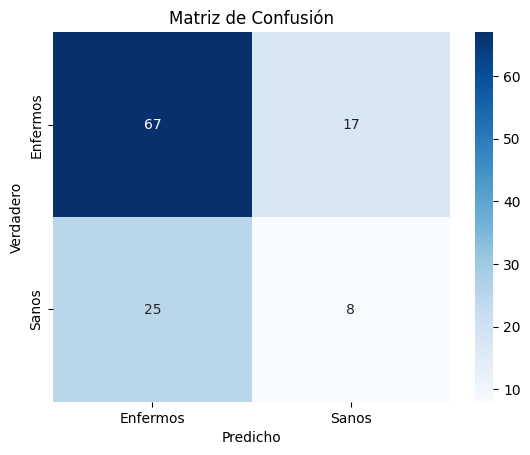

In [ ]:
# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión usando Seaborn
class_names = ["Enfermos", "Sanos"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

Una vez obtenidos estos resultados observamos que todas las métricas mejoran  con respecto al modelo anterior. Las mejoras no son extremadamente grandes pero en un problema tan sensible como la detección de enfermedades todo cambio a mejor es bueno. Además como en nuestro caso no tenemos una gran cantidad de datos el ajustar 3 hiperparámetros no crea un gasto excesivo de energia en el ordenador por lo que sigue siendo manejable y adecuado el segundo modelo.


Por último vemos de forma gráfica el acuraccy del modelo final. Es una manera alternativa a la matriz de confusión donde se observa que ha predicho bien 75/117 nuevos casos.

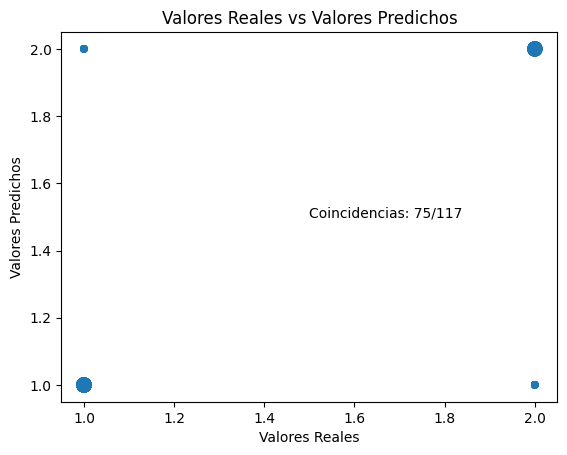

In [ ]:
y_test2 = np.array(y_test)
correct = sum([1 for i in range(len(y_test2)) if y_test2[i] == y_pred[i]])

aciertos = (y_test == y_pred)

# Definir tamaños de los puntos (mayor tamaño para aciertos, menor tamaño para errores)
tamanos = [100 if acierto else 20 for acierto in aciertos]

# Crear un gráfico de dispersión con diferentes tamaños de puntos
plt.scatter(y_test, y_pred, s=tamanos)

plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs Valores Predichos")
plt.text(1.5, 1.5, f'Coincidencias: {correct}/{len(y_test2)}')
plt.show()



## Árbol de clasificación.

Por otra parte, construiremos un árbol de clasificación, estos son algoritmos de aprendizaje supervisado utilizados para la clasificación que divide el conjunto de datos en nodos mediante reglas de decisión, de manera que se crean ramas que representan diferentes opciones de clasificación de nuestros datos.

Son una forma poderosa y comprensible de realizar clasificaciones, pero también pueden ser propensos al sobreajuste. La optimización de hiperparámetros es un proceso importante para la mejora de la precisión del modelo y asimismo evitar el sobreajuste.

En esta parte del documento realizaremos el preprocesamiento mediante un pipeline a diferencia del apartado anterior que relizamos el preprocesamiento de nuestros datos de forma manual.

Un pipeline, en el contexto del aprendizaje automático y el procesamiento de datos, es una secuencia de pasos encadenados que se utilizan para procesar y transformar datos. Estos pasos se ejecutan de manera secuencial, uno después del otro, y cada paso utiliza la salida del paso anterior como entrada. Se utiliza comúnmente en tareas de preprocesamiento de datos, entrenamiento de modelos y predicción como lo veremos a continuación.

Cargamos los datos como en el inicio del documento ya que en este caso realizaremos el preprocesamiento de los datos mediante un pipeline, es decir, necesitamos tener los datos en crudo nuevamente:

In [ ]:
#Cargamos los datos nuevamente y lo asignamos a una variable.
df = pd.read_csv('/content/drive/MyDrive/Practica 1/ILPD.csv')


In [ ]:
X=df.drop('Dataset', axis=1) #Aqui tengo todas las variables menos la variable respuesta
y=df['Dataset'] #Separo la variable respuesta en un unico vector

###  Construiremos el árbol de clasificación en Python y SciKitLearn:

Para crear el modelo, procedemos a automatizar el preproceso de los datos, optimización de hiperparámetros y evaluación del árbol de clasificación utilizando un pipeline con técnicas de preprocesamiento y clasificación, además utilizaremos GridSearch para la búsqueda de los valores de hiperparámetros que mejoren lo máximo posible en rendimiento del modelo.

En primer lugar, realizamos una división de nuestros datos originales en una proporción del 80% para datos de entrenamiento y 20% para datos de prueba.

Luego, diferenciamos entre variables numéricas y categóricas del conjunto de datos X (Conjunto de datos que contiene a nuestros predictores) para la futura creación de nuestro pipeline.

Definimos los pasos del preprocesamiento, en este caso, para las variables numéricas imputamos el valor de la media de cada variable en los valores vacios de cada una de las columnas mediante la función **"SimpleImputer"** y luego estandarizamos nuestros datos numéricos mediante la función **"StandardScaler"**. Por otra parte, en cuanto a las variables categoricas las codificamos mediante la función **"OneHotEncoder"**, por último, creamos el **"preprocessor"** en donde unificamos los tres pasos mencionados anteriormente para realizar el preprocesamiento de nuestros datos.

Una vez creado el pipeline con las técnicas de preprocesamiento de datos procedemos a crear nuestro **"tree_pipeline"** en donde se unifican dos pasos, el **"preprocessor"** en donde se preprocesan nuestros datos y luego incluímos el **"DecisionTreeClassifier"** que crea el modelo de árbol utilizando el preprocesamiento definido.

Ahora podemos pasar a definir los hiperparámetros a probar para el modelo, en este caso, max_depth y min_split de los cuales buscaremos la combinación de estos que nos devuelva la mejor accuracy del modelo mediante **"GridSearchCV"** que es una validación cruzada de 10 divisiones (KFold). Destacamos que la búsqueda de hiperparámetros se realiza con la muestra de entrenamiento.






In [ ]:

# Dividir los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar las características numéricas y categóricas
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Definir los pasos de preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Combinar pasos de preprocesamiento en un ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Crear el pipeline con preprocesamiento y modelo de árbol de decisión
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Definir los hiperparámetros para la búsqueda grid
param_grid = {
    'classifier__max_depth': [3, 5, 7, 9, 10, 11],
    'classifier__min_samples_split': [2, 5, 10]
}

# Realizar la búsqueda de hiperparámetros con validación cruzada k-fold y precisión (accuracy) como métrica
grid_search = GridSearchCV(tree_pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_max_depth = grid_search.best_params_['classifier__max_depth']
best_model = grid_search.best_estimator_
best_min_samples_split = grid_search.best_params_['classifier__min_samples_split']

# Evaluar el modelo con el conjunto de prueba
accuracy = best_model.score(x_test, y_test)
#print("Mejores parámetros:", best_params)
print("Accuracy en conjunto de prueba:", accuracy)

print(f"Mejor max_depth: {best_max_depth}")
print(f"Mejor min_samples_split: {best_min_samples_split}")

Accuracy en conjunto de prueba: 0.6923076923076923
Mejor max_depth: 7
Mejor min_samples_split: 10


Podemos observar que los hiperparámetros extraídos que nos proporcionan el mejor modelo **(best_model)** son un **max_depth** igual a 7 y un **min_samples_split** igual a 10.


*   **classifier_max_depth:** Representa la profundidad máxima del árbol.
*  **classifier_min_split:** Define el número mínimo de muestras requeridas para dividir un nodo interno.

Destacamos el hecho de que hemos elegido dichos valores para cada hiperparámetro ya que no contamos con una cantidad de datos excesivamente grande por lo que no tiene sentido intentar ajustar un modelo de gran tamaño.

Finalmente, podemos pasar a evaluar el rendimiento del modelo con los mejores hiperparámetros seleccionados con los datos de prueba que definimos inicialmente, obteniendose un **accuracy** igual a 0.69, es decir, el modelo de árbol con los hiperparámetros extraídos clasifica correctamente el 69% de las muestras en el conjunto de prueba.

Destacamos que este accuracy tiene un valor que podemos considerar mejorable aunque es el mejor valor que nos proporciona el algoritmo al momento de ajustar los hiperparámetros, sin embargo, evaluaremos otras métricas para conocer con mayor profundidad el rendimiento de nuestro modelo.

In [ ]:
# Ajusta el pipeline con los datos de entrenamiento originales
tree_pipeline.fit(x_train, y_train)

# Obtiene el conjunto de entrenamiento preprocesado directamente del modelo entrenado
x_train_preprocessed = tree_pipeline.named_steps['preprocessor'].transform(x_train)

# Entrena el modelo con los datos preprocesados
best_model = tree_pipeline.named_steps['classifier']
best_model.fit(x_train_preprocessed, y_train)


DecisionTreeClassifier(random_state=42)

Una vez obtenido la combinación de hiperparámetros que nos proporciona el mejor modelo posible según el accuracy podemos pasar a entrenarlo utilizando el pipeline creado en scikit-learn.

Observamos que el primer paso en esta parte del procedimiento es ajustar o entrenar el pipeline **"tree_pipeline"** creado utilizando los datos de entrenamiento, en este caso, **"x_train"** e **y_train"**.

Seguidamente se utiliza el modelo entrenado para preprocesar nuestros datos. Esto lo hemos realizado accediendo al paso de preprocesamiento del pipeline y guardando nuestros datos de entrenamiento procesados en la variable **"x_train_preprocessed"**

Por último, se accede al clasificador dentro del pipeline y se entrena finalmente el árbol utilizando los datos de entrenamiento previamente procesados.

Podemos observar con más claridad una de las ventajas más relevantes de los pipelines ya que estamos realizando un claro encadenamiento de las operaciones de preprocesamiento y modelado para simplificar el flujo de trabajo y mejorar la reproducibilidad de nuestras operaciones.


In [ ]:
# Preprocesamos los datos de prueba mediante el pipeline creado
x_test_preprocesado = tree_pipeline.named_steps['preprocessor'].transform(x_test)

# Calculamos las predicciones para los datos de test
y_pred2 = best_model.predict(x_test_preprocesado)

# Calculamos el accuracy
accuracy_score(y_test, y_pred2)

0.6923076923076923

Realizamos las predicciones en el conjunto de datos de test utilizando el mejor modelo que hemos obtenido tras la búsqueda de hiperparámetros y entrenamiento con el pipeline.

Al calcular el accuracy lo que estamos llevando a cabo es la comparación de las predicciones calculadas con las etiquetas reales del conjunto de datos de test, obteniendose nuevamente un accuracy igual a 0.69, es decir,  el 69% de las predicciones coinciden con los datos reales de la muestra test.

Este es un resultado bastante esperable ya que para obtener las predicciones hemos utilizado el modelo con los hiperparámetros que nos devolvían el mejor accuracy, en este caso, 69%.

Profundidad del árbol: 7
Número de nodos terminales: 32


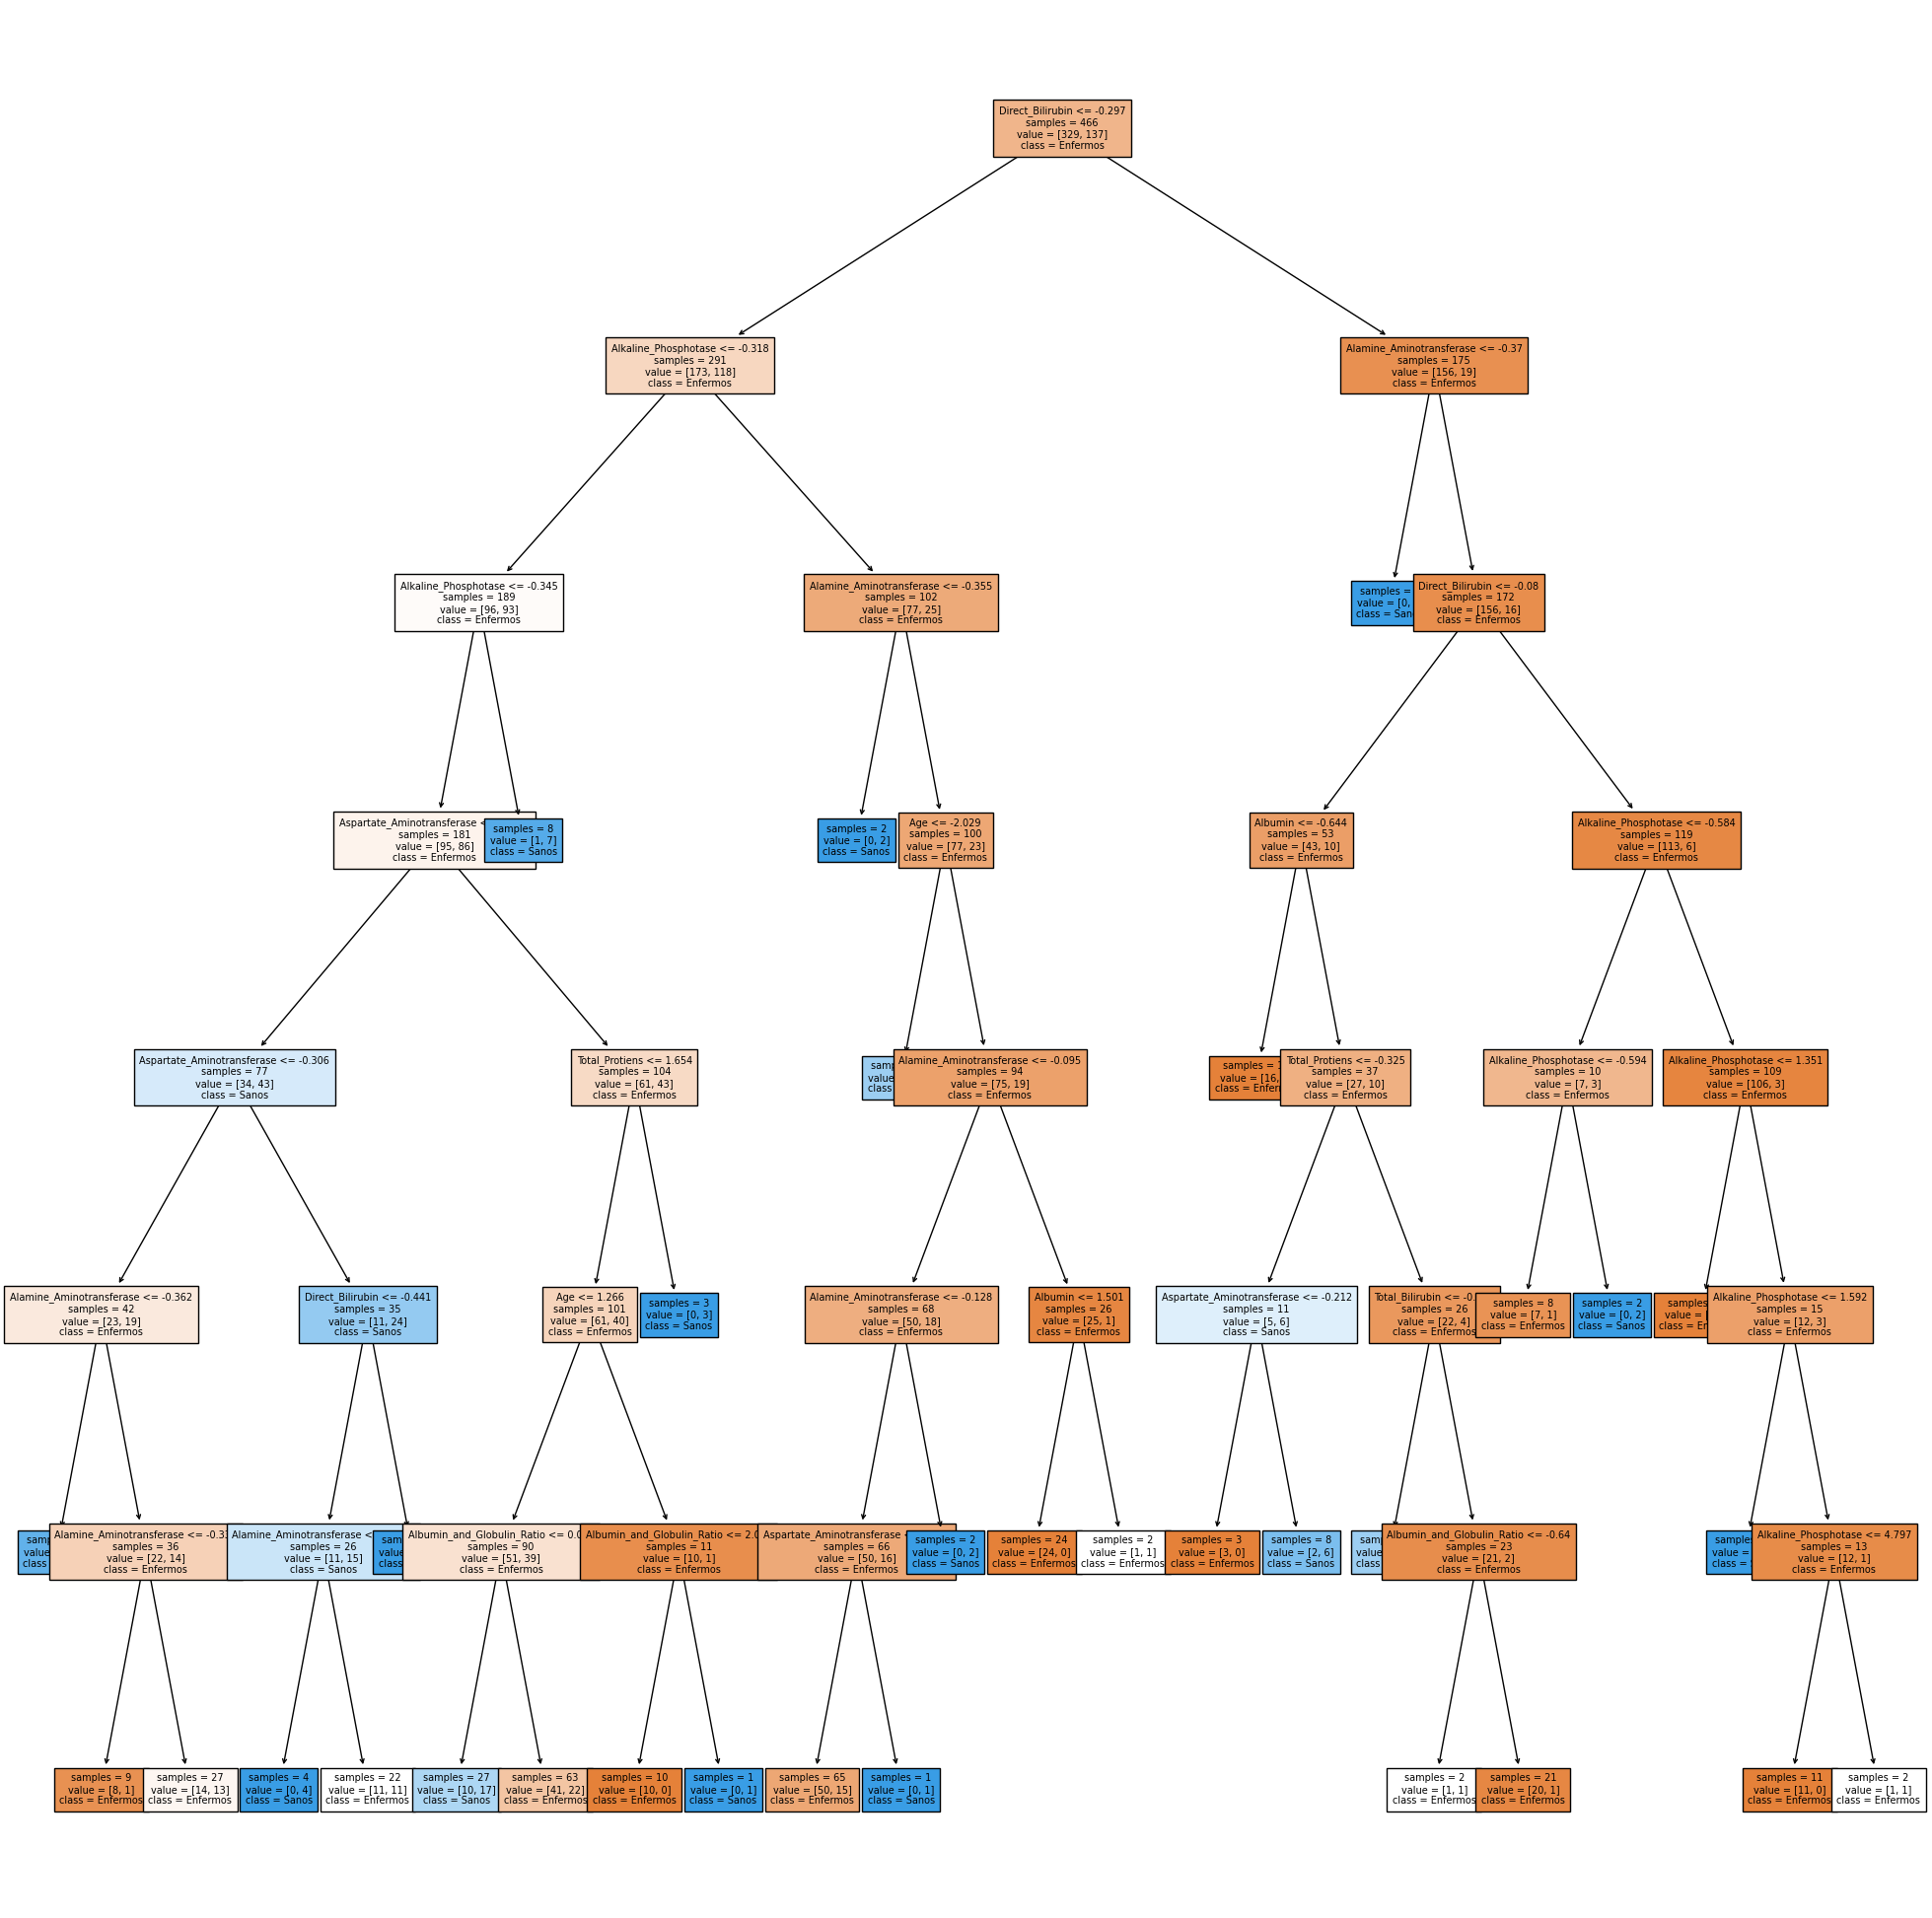

In [ ]:
# Creamosel modelo con los hiperparámetros extraídos
modelo = DecisionTreeClassifier(max_depth = best_max_depth, min_samples_split= best_min_samples_split)
modelo.fit(x_train_preprocessed, y_train)

# Graficamos el árbol de clasificación
fig, ax = plt.subplots(figsize=(25, 25))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = ["Age", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", "Alamine_Aminotransferase",
                             "Aspartate_Aminotransferase", "Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio",
                             "Gender_Female", "Gender_Male"],
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax,
            class_names = ["Enfermos", "Sanos"]
       )

Podemos observar el árbol de clasificación creado de forma gráfica con la combinación de hiperparámetros extraídos del GridSearch que nos proporciona una exactitud igual al 69%.

In [ ]:
#Métricas para el árbol de clasificación
precision2=precision_score(y_test, y_pred2)
print("Precisión:", precision2)
recall2=recall_score(y_test, y_pred2)
print("Recall:", recall2)
f1a=f1_score(y_test, y_pred2)
print("F1:", f1a)

Precisión: 0.8
Recall: 0.7816091954022989
F1: 0.7906976744186047


Como hemos mencionado anteriormente, calculamos métricas adicionales para conocer con mayor profundidad la solidez que presenta nuestro modelo de árbol. En este caso podemos observar como las métricas presentadas indican un rendimiento bastante sólido de nuestro modelo.

En cuanto a la **Precisión** tenemos un valor igual a 0.8, es decir, el 80% de las instancias predichas como positivas por el modelo realmente son positivas.

Contamos con un **Recall** (Sensibilidad o Tasa de verdaderos positivos) igual a 0.7816, por lo tanto, podemos afirmar que el modelo identifica correctamente el 78.16% de todas las instancias positivas en el conjunto de datos.

Por último, contamos con una **Puntuación F1** igual a 0,79, es decir, contamos con un modelo que tiene bastante equilibrio entre la presición y el recall.

Gracias a las métricas expuestas que utilizamos para complementar la información brindada por el accuracy podemos afirmar que contamos con un modelo bastante solido que nos proporciona predicciones muy fiables teniendo en cuenta el contexto sobre el que estamos trabajando.

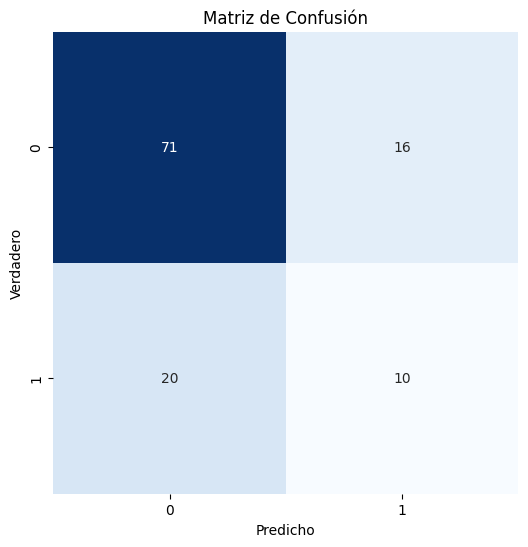

In [ ]:
# Creamos la matriz de confusión

conf_matrix = confusion_matrix(y_test, y_pred2)

# Visualiza la matriz de confusión con seaborn y matplotlib
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

En este caso hemos hecho uso nuevamente de la matriz de confusión para evaluar de una forma gráfica y sencilla la solidez del modelo ajustado.

Podemos observar que nuestro modelo ha clasificado exitosamente 81 casos de 117 casos totales, lo que nos permite reafirmar que el modelo ajustado funciona bastante bien para el conjunto de datos en cuestión.

In [ ]:
# Entrenamos el modelo con todos los datos
tree_pipeline.fit(X, y)

tree_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Gender'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

Después de haber realizado el procedimiento mediante pipelines en su totalidad, es decir, el preprocesamiento de nuestros datos, la creación del modelo y el ajuste de la mejor combinación de hiperparámetros, podemos pasar finalmente a entrenar el modelo con todos los datos con los que contamos.

##  Conclusiones

Tras la realización de la práctica podemos sacar diversas conclusiones sobre la misma. En primer lugar nos parece interesante destacar las claras diferencias entre realizar el trabajo de campo mediante la utilización  de pipelines y llevarlo a cabo de forma manual ya que para la la construcción del modelo KNN hemos realizado el preprocesamiento de nuestros datos de forma manual y para la construcción de nuestro árbol de clasificación lo hemos realizado haciendo uso de pipelines.

El uso de pipelines permite tanto automatizar en mayor cuantía los procedimientos que realizamos cuando hablamos de aprendizaje automático como aumentar la reproducibilidad del código creado para un problema en específico, es decir, un código entero creado para un problema determinado lo podemos reproducir para cualquier otro conjunto de datos todas las veces que sean necesarias, por lo tanto, se puede adaptar a cualquier problema que queramos estudiar.

Por otra parte, destacamos que haciendo uso de pipelines el código es mucho más sencillo y compacto lo que permite detectar errores de forma más rápida, además nos permite optimizar el tiempo al momento de realizar el trabajo de campo, que es una etapa fundamental al inicio de cualquier procedimiento en donde tratamos una cantidad importante de datos.

En cuanto a la realización del preprocesamiento de forma manual, podemos destacar que es un procedimiento un poco más controlado, es decir, es posible observar paso a paso que esta sucediendo con nuestros datos y controlar más que etapas queremos ir llevando a cabo ya que se realiza paso a paso y los pasos son independientes uno de los otros.

En resumen, nos parece mas efectivo y eficiente trabajar mediante el uso de pipelines teniendo en cuenta que es primera vez que hacemos uso de los mismos nos ha parecido una forma bastante eficiente de conocer, preprocesar y clasificar nuestros datos mediante un código sencillo y compacto.

Finalmente, podemos pasar a evaluar y comparar los algoritmos mediante las métricas utilizadas en el estudio, en este caso, nos basaremos en el accuracy y la sensibilidad ya que al tratarse de un problema de clasificación de pacientes sanos o afectados es importante minimizar los falsos negativos ya que es de suma importancia tener identificados muy bien a los pacientes enfermos para asignarles un tratamiento correcto y llevarlos correctamente controlados.

En cuanto al modelo KNN hemos conseguido un **Accuracy** igual a 0.64 y una **Sensibilidad** igual a 0.79 y en el caso del modelo de árbol de clasificación hemos obtenido un **Accuracy** igual a 0.69 y una **Sensibilidad** de 0.7816. Podemos afirmar que para el problema en el que nos encontramos, el modelo de árbol creado es una mejor opción para realizar la clasificación de nuestros pacientes ya que teniendo en cuenta de que la sensibilidad es ligeramente menor en el árbol, la exactitud del mismo es mayor en una cuantía más considerable, por lo que estas dos métricas se complementan bastante bien ofreciendonos una solidez más fuerte en las predicciones obtenidas, por lo tanto, en las futuras clasificaciones.